In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers  import LSTM
from tensorflow.keras.layers import Dropout

C:\Users\Prerna\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset_train = pd.read_csv("Ass-4_RNN_Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
training_set =dataset_train.iloc[:,1:2].values

In [4]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
X_train = np.reshape(X_train, newshape =(X_train.shape[0], X_train.shape[1], 1))

In [7]:
#50 units provide a good balance between model complexity (ability to learn patterns) and computational efficiency.(Rule of Thumb)
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))

In [8]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [9]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
46/46 [==============================] - 13s 139ms/step - loss: 0.0262
Epoch 2/100
46/46 [==============================] - 6s 132ms/step - loss: 0.0037
Epoch 3/100
46/46 [==============================] - 6s 139ms/step - loss: 0.0038
Epoch 4/100
46/46 [==============================] - 6s 140ms/step - loss: 0.0036
Epoch 5/100
46/46 [==============================] - 6s 120ms/step - loss: 0.0036
Epoch 6/100
46/46 [==============================] - 5s 114ms/step - loss: 0.0028
Epoch 7/100
46/46 [==============================] - 6s 138ms/step - loss: 0.0028
Epoch 8/100
46/46 [==============================] - 4s 93ms/step - loss: 0.0028
Epoch 9/100
46/46 [==============================] - 6s 133ms/step - loss: 0.0027
Epoch 10/100
46/46 [==============================] - 5s 107ms/step - loss: 0.0028
Epoch 11/100
46/46 [==============================] - 6s 136ms/step - loss: 0.0026
Epoch 12/100
46/46 [==============================] - 6s 123ms/step - loss: 0.0028
Epoch 13/100


In [10]:
dataset_test = pd.read_csv("Ass-4_RNN_Google_Stock_Price_Test.csv")
dataset_test.head(5)

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600


In [11]:
real_stock_price = dataset_test.iloc[:,1:2].values
real_stock_price.shape

(125, 1)

In [12]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [18]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

[[-0.34955079]
 [-0.3495331 ]
 [-0.34951211]
 [-0.34951211]
 [-0.34952202]
 [-0.34950036]
 [-0.34949318]
 [-0.34949302]
 [-0.34949588]
 [-0.34949354]
 [-0.34950265]
 [-0.34949722]
 [-0.34949709]
 [-0.34952789]
 [-0.34953046]
 [-0.34951211]
 [-0.34946605]
 [-0.34945846]
 [-0.34945654]
 [-0.3494534 ]
 [-0.34944622]
 [-0.34944567]
 [-0.34943481]
 [-0.34943752]
 [-0.3494324 ]
 [-0.34942692]
 [-0.3494388 ]
 [-0.3494436 ]
 [-0.34944491]
 [-0.34945024]
 [-0.34944502]
 [-0.34942689]
 [-0.34944859]
 [-0.34944377]
 [-0.34942533]
 [-0.34942395]
 [-0.34941744]
 [-0.34939363]
 [-0.34941321]
 [-0.34944526]
 [-0.34945562]
 [-0.34946058]
 [-0.34948696]
 [-0.34947819]
 [-0.34944832]
 [-0.3494214 ]
 [-0.34942454]
 [-0.34941802]
 [-0.34940778]
 [-0.34940955]
 [-0.34939438]
 [-0.34937629]
 [-0.34936189]
 [-0.34936729]
 [-0.34937807]
 [-0.34938413]
 [-0.34938892]
 [-0.34939   ]
 [-0.34939913]
 [-0.34940683]
 [-0.34940428]
 [-0.34937908]
 [-0.3493417 ]
 [-0.34933223]
 [-0.34931924]
 [-0.34930793]
 [-0.34932

In [14]:
x_test=[]
for i in range(60,len(inputs)):
  x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,newshape=(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [15]:
predicted_stock_price = regressor.predict(x_test)


4/4 [==============================] - 2s 26ms/step


In [16]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

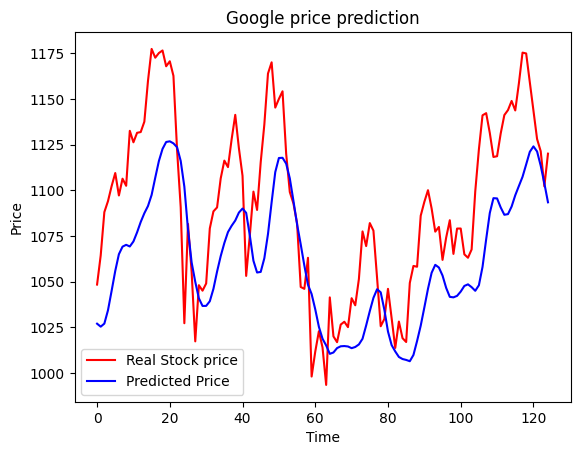

In [17]:
plt.plot(real_stock_price,label='Real Stock price',color='red')
plt.plot(predicted_stock_price,label='Predicted Price',color='blue')
plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()